In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import pandas as pd
from sklearn.metrics import r2_score


#the files containing data scraped from graphs
filename100 = 'stakebake_data/stakebake.csv'
filename250 = 'stakebake_data/stakebake250.csv'
filename50 = 'stakebake_data/stakebake50.csv'
filename150 = 'stakebake_data/stakebake150.csv'
filename206 = 'stakebake_data/stakebake206.csv'
filename91 = 'stakebake_data/stakebake91.csv'

#read in data for each temperature
#these are for training model
dat100 = pd.read_csv(filename100)
dat250 = pd.read_csv(filename250)
dat50 = pd.read_csv(filename50)
dat150 = pd.read_csv(filename150)
dat206 = pd.read_csv(filename206)
dat91 = pd.read_csv(filename91)


#mass U not given but needed for equation
#can be calculated from the total hydrogen reacted maxh.
def calc_U_mass(maxh):
    atoms = maxh*0.5*(6.022e23)
    atoms_in_cm3 = 8.22e22
    U_cm3 = atoms/atoms_in_cm3
    rho_U = 19
    mass_U = rho_U*U_cm3
    return mass_U

#performing the Stakbake equation
#pass in an array of times, maxh, T, ff=arrhenius frequency factor
def Stakebake2(time,wm,T,ff):
    arrk=-ff
    n=0.65
    K = arrk*(n-1)
    Mo = calc_U_mass(wm)
    M = Mo**(n-1)
    wt = (1-(1+(K*M*time))**(1/(n-1)))*wm
    return wt


#array of times between 0 and 300, resolution=0.1
t=np.linspace(0,300,3001)

#perform stakebake calculations
ans50 = Stakebake2(t, np.max(dat50[' y'])/1000, 323,0.484/50)
ans100 = Stakebake2(t, np.max(dat100[' y'])/1000, 373,2.08/50)
ans150 = Stakebake2(t, np.max(dat150[' y'])/1000, 423,3.41/50)
ans206 = Stakebake2(t, np.max(dat206[' y'])/1000, 479,2.38/50)
ans250 = Stakebake2(t, np.max(dat250[' y'])/1000, 523,1.83/50)



/Users/willhob/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


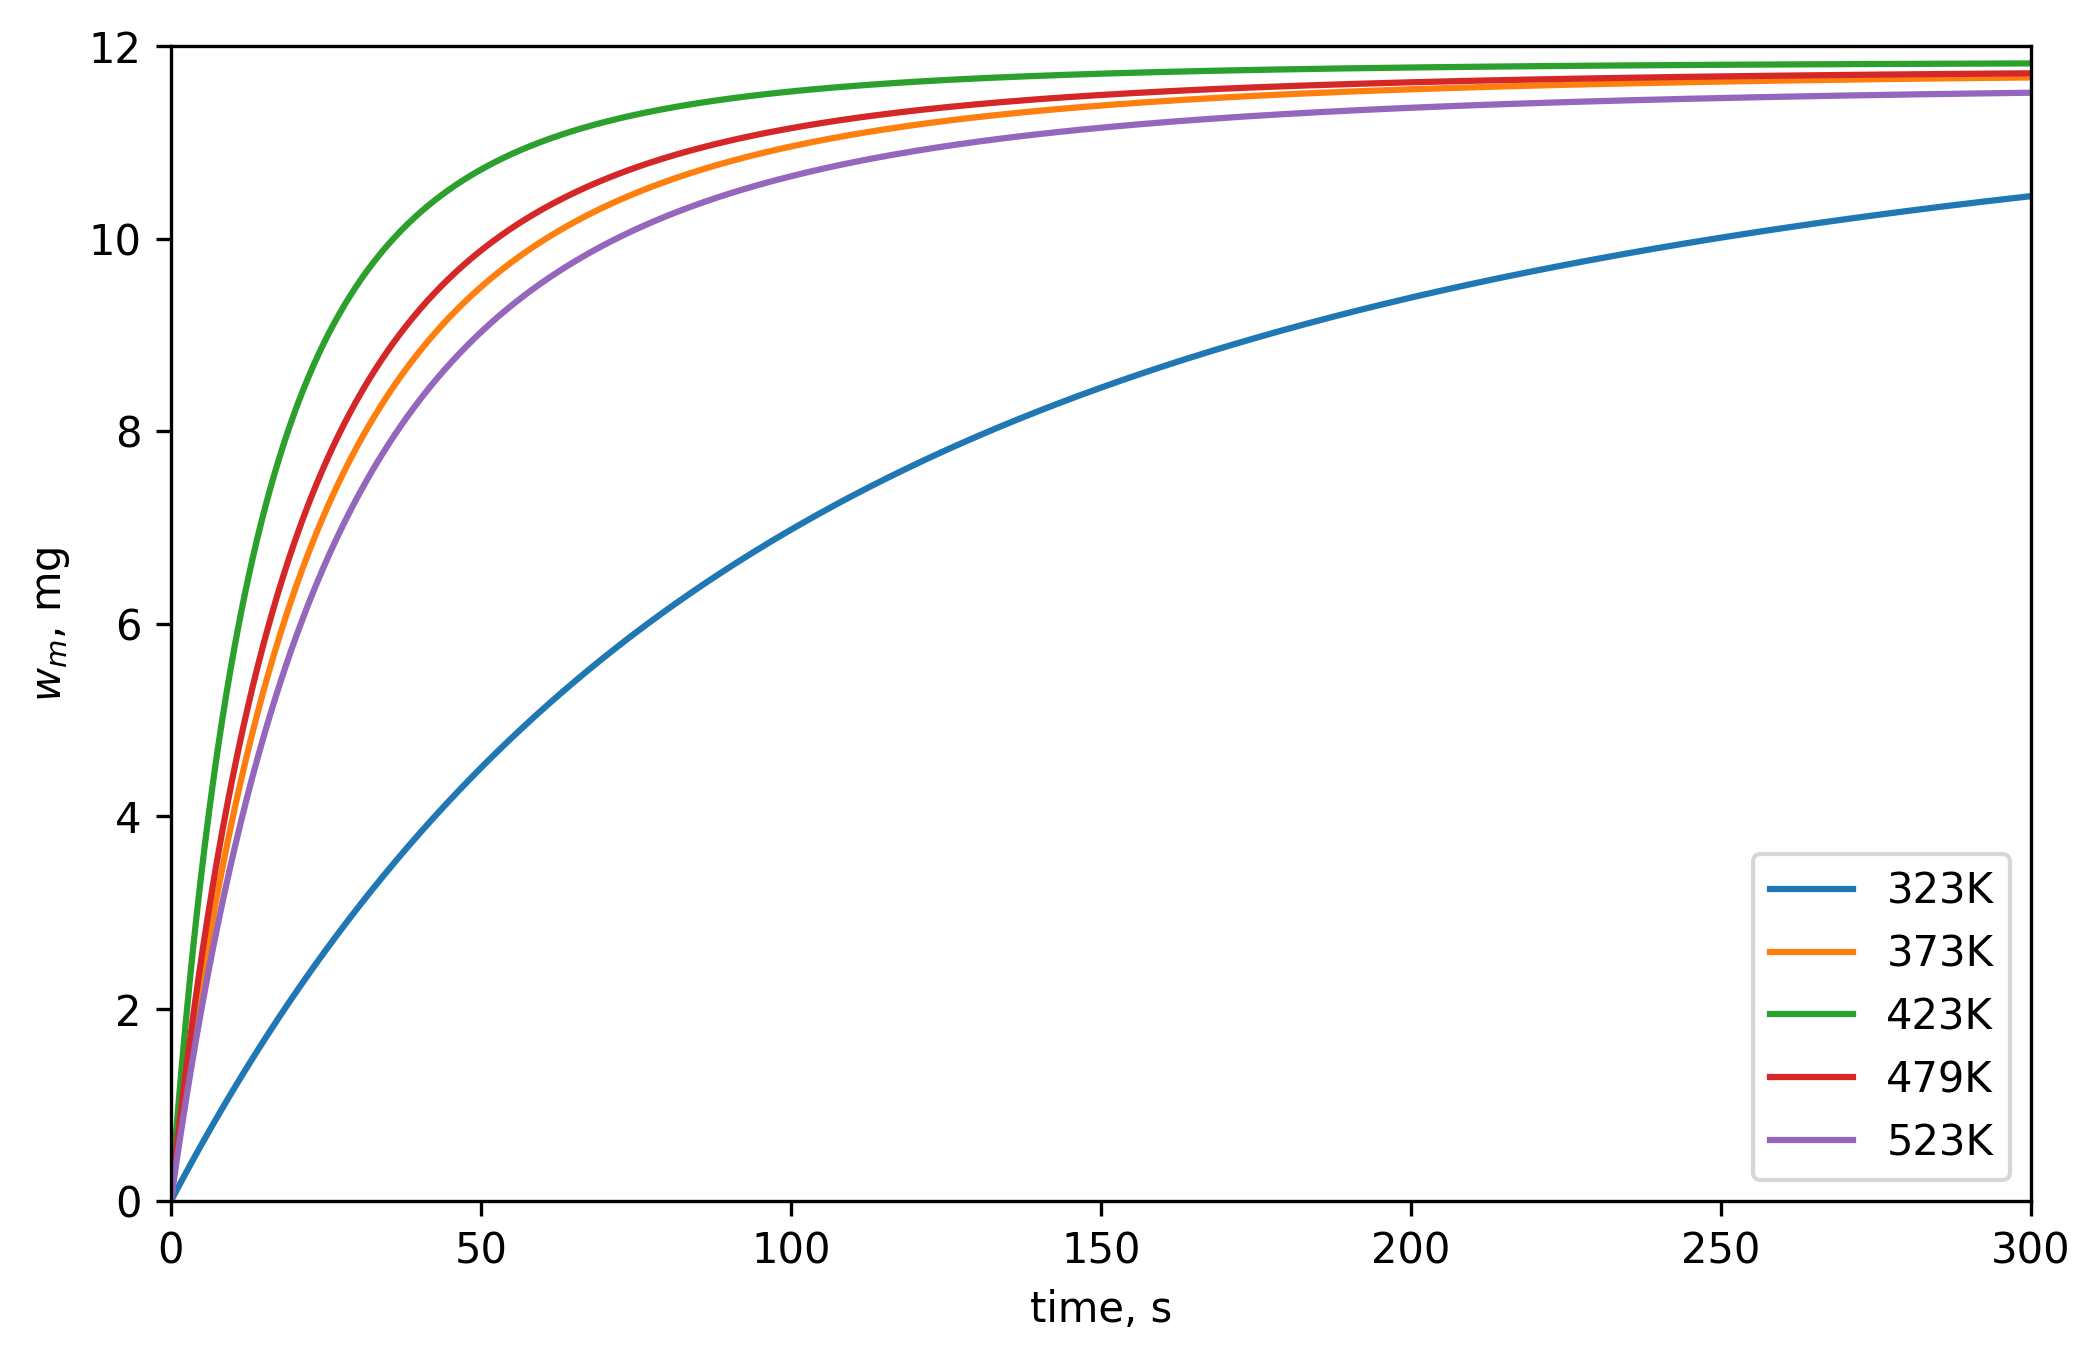

In [2]:
fig,ax=plt.subplots(figsize=(8,5))

ax.plot(t, ans50*1000, label='323K')

ax.plot(t, ans100*1000, label='373K')

ax.plot(t, ans150*1000,label='423K')

ax.plot(t, ans206*1000, label='479K')

ax.plot(t, ans250*1000, label='523K')

ax.set_xlim(0,300)
ax.set_ylim(0,12)

ax.set(xlabel = 'time, s', ylabel = r'$w_{m}$, mg')

#ax.plot(np.array(dat50['x'])*60, np.array(dat50[' y']), linestyle='dashed')
#ax.plot(np.array(dat100['x'])*60, np.array(dat100[' y']), linestyle='dashed')
#ax.plot(np.array(dat150['x'])*60, np.array(dat150[' y']), linestyle='dashed')
#ax.plot(np.array(dat206['x'])*60, np.array(dat206[' y']), linestyle='dashed')
#ax.plot(np.array(dat250['x'])*60, np.array(dat250[' y']), linestyle='dashed')

ax.legend()

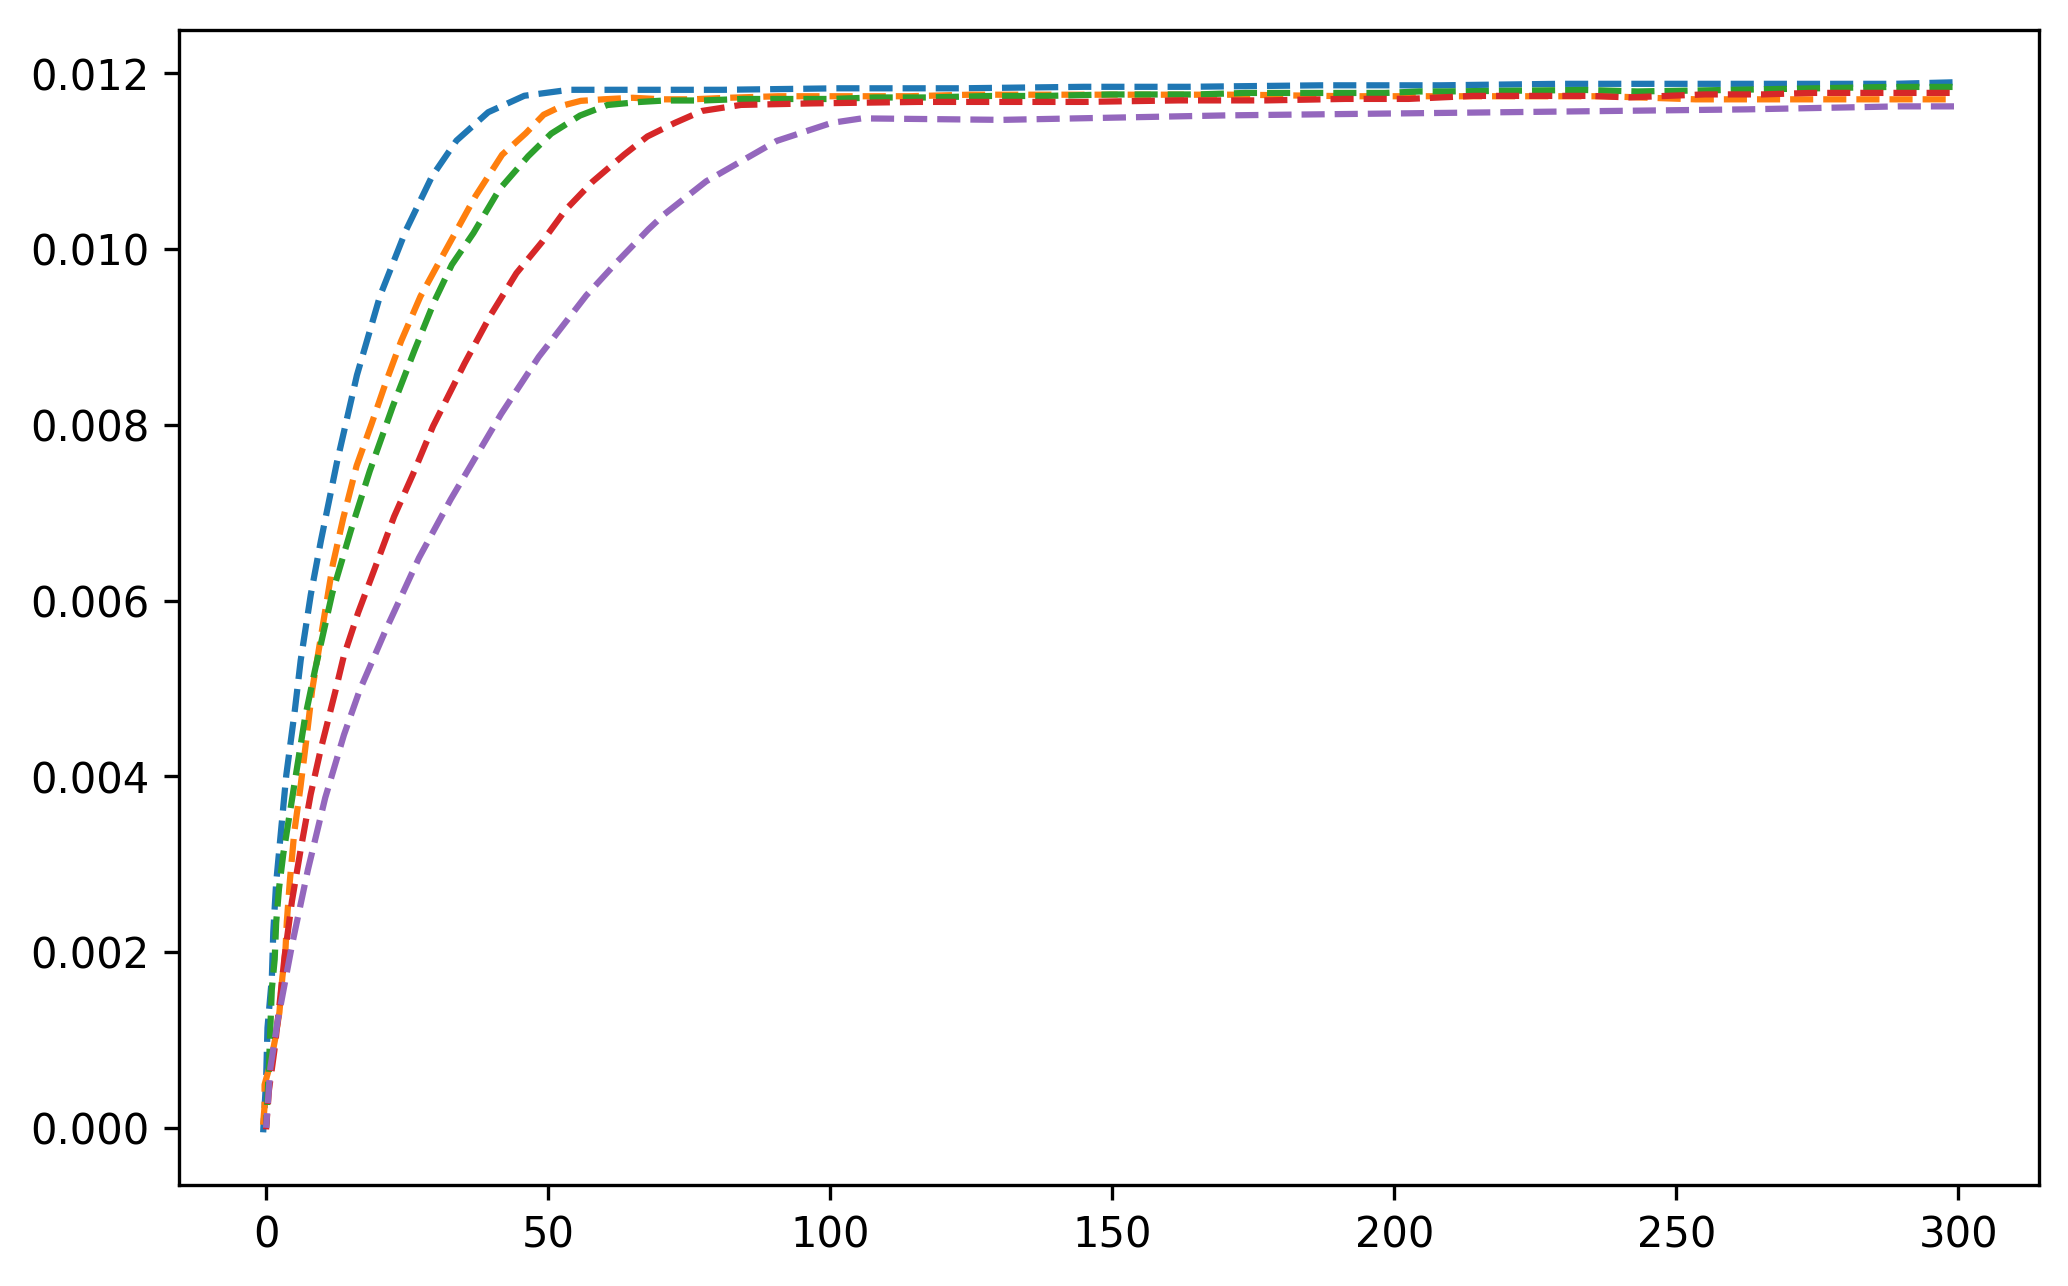

In [3]:
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(np.array(dat50['x'])*60, np.array(dat50[' y'])/1000, linestyle='dashed')
ax.plot(np.array(dat100['x'])*60, np.array(dat100[' y'])/1000, linestyle='dashed')
ax.plot(np.array(dat150['x'])*60, np.array(dat150[' y'])/1000, linestyle='dashed')
ax.plot(np.array(dat206['x'])*60, np.array(dat206[' y'])/1000, linestyle='dashed')
ax.plot(np.array(dat250['x'])*60, np.array(dat250[' y'])/1000, linestyle='dashed')
